In [2]:
!pip install librosa matplotlib IPython

import librosa
from librosa import display
import numpy as np
import IPython.display as ipd
import matplotlib as plt

In [22]:
file1='radhe_radhe_barsane.wav'
file2='song.wav'
file3='likhe_jo_khat_tujhe.wav'
file4='testAudio.wav'

In [75]:
y, sr = librosa.load(file4)
ipd.Audio(data=y[1*sr:15*sr], rate=sr)

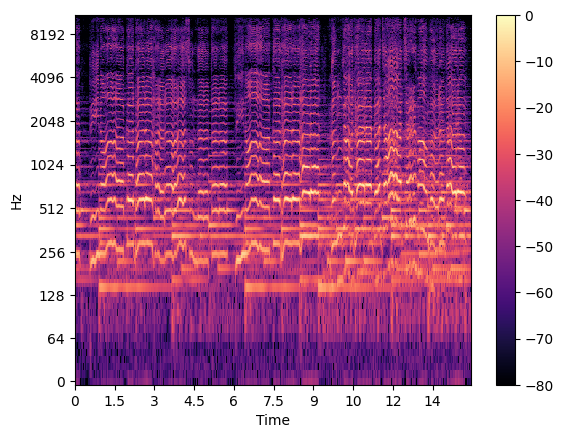

In [81]:
S_full, phase = librosa.magphase(librosa.stft(y))
idx = slice(*librosa.time_to_frames([1*15], sr=sr))
fig, ax = plt.pyplot.subplots()
img = display.specshow(librosa.amplitude_to_db(S_full[:, idx], ref=np.max), y_axis='log', x_axis='time', sr=sr, ax=ax)
fig.colorbar(img, ax=ax)

In [82]:
S_filter = librosa.decompose.nn_filter(S_full, aggregate=np.median, metric='cosine', width=int(librosa.time_to_frames(2, sr=sr)))
S_filter = np.minimum(S_full, S_filter)

In [78]:
margin_i, margin_v = 1, 3
power = 3

mask_i = librosa.util.softmask(S_filter, margin_i * (S_full - S_filter), power=power)
mask_v = librosa.util.softmask(S_full - S_filter, margin_v * S_filter, power=power)

S_foreground = mask_v * S_full
S_background = mask_i * S_full

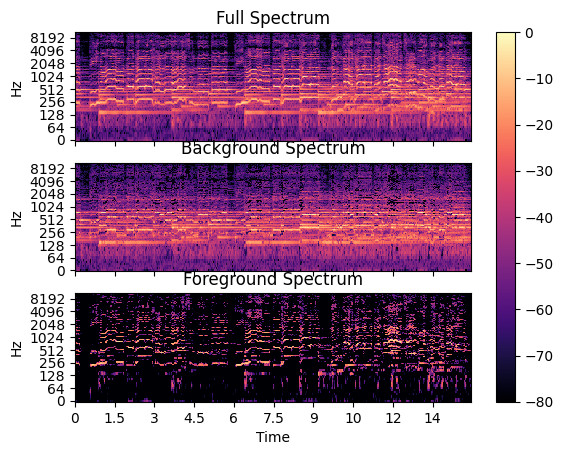

In [79]:
fig, ax = plt.pyplot.subplots(nrows=3, sharex=True, sharey=True)
img = display.specshow(librosa.amplitude_to_db(S_full[:, idx], ref=np.max), y_axis='log', x_axis='time', sr=sr, ax=ax[0])
ax[0].set(title='Full Spectrum')
ax[0].label_outer()

display.specshow(librosa.amplitude_to_db(S_background[:, idx], ref=np.max), y_axis='log', x_axis='time', sr=sr, ax=ax[1])
ax[1].set(title='Background Spectrum')
ax[1].label_outer()

display.specshow(librosa.amplitude_to_db(S_foreground[:, idx], ref=np.max), y_axis='log', x_axis='time', sr=sr, ax=ax[2])
ax[2].set(title='Foreground Spectrum')
ax[2].label_outer()

fig.colorbar(img, ax=ax)

In [80]:
y_foreground = librosa.istft(S_foreground * phase)
ipd.Audio(data=y_foreground[1*sr:15*sr], rate=sr)

In [68]:
y_background = librosa.istft(S_background * phase)
ipd.Audio(data=y_background[1*sr:15*sr], rate=sr)